# MultiOn API Example

Install the latest `multion` python package

In [1]:
!pip install --upgrade multion -q

In [2]:
import multion

In [3]:
multion.__version__

'0.3.10'

### Generate MultiOn API Key and login

Visit [here](https://app.multion.ai/api-tokens) to create your MultiOn API Key

In [4]:
multion.login(use_api=True, multion_api_key='<YOUR_MULTION_API_KEY>')

Please visit this URL to generate an API Key: https://app.multion.ai/api-tokens


### Set API Mode
Switch the API to local mode to run the Agent locally with the MultiOn Browser Extension for testing

(You can enable the remote mode to run on our hosted cloud for production use)

In [5]:
multion.set_remote(False)

False

### Try the MultiOn Browse API

Give an input language command, starting url and max steps for the agent to take

In [11]:
multion.browse(
    {
        "cmd": "what is the weather today in sf",
        "url": "https://www.google.com",
        "maxSteps": 10,
    }
)

{'result': 'ANSWER: The weather today in San Francisco is cloudy with a temperature of 55°F (13°C). The precipitation chance is 0%, humidity is at 95%, and the wind is blowing at 13 mph.\n\nSTATUS: DONE',
 'status': 'DONE',
 'lastUrl': 'https://www.google.com/search?q=weather+today+in+San+Francisco&sca_esv=598340749&source=hp&ei=q62jZYH7FvHP0PEPobSP8AE&iflsig=ANes7DEAAAAAZaO7u778bnZ2V84euhVm804D8nBT-pLS&ved=0ahUKEwjB_PDFzNyDAxXxJzQIHSHaAx4Q4dUDCAw&uact=5&oq=weather+today+in+San+Francisco&gs_lp=Egdnd3Mtd2l6Ih53ZWF0aGVyIHRvZGF5IGluIFNhbiBGcmFuY2lzY28yBRAAGIAEMgUQABiABDIGEAAYFhgeMgYQABgWGB4yBhAAGBYYHjIGEAAYFhgeMgYQABgWGB4yBhAAGBYYHjIGEAAYFhgeMgYQABgWGB5IalAAWABwAHgAkAEAmAE8oAE8qgEBMbgBA8gBAPgBAQ&sclient=gws-wiz',
 'content': 'Google Weather today in San Francisco xiv\n\n \n\nQ 8\n\n \n\nNews Perspectives Images Videos_~— Shopping = Maps = Books__—Flights.-—_-Finance Allfilters > Tools SafeSearch +\n\nAbout 193,000,000 results (0.36 seconds)\n\nResults for San Francisco, CA - Choose area\n

### OPTIONAL: Try the MultiOn Low-level APIs for granular control

`create_session`: Create a new MultiOn Agent with a given starting url

In [12]:
response = multion.create_session({"url": "https://www.google.com"})
print(response['message'])
session_id = response['session_id']
session_id

New Session Created


'1e5f7554-d29f-478f-a282-262d31167616'

`step_session`: Steps the MultiOn Agent once using the specified input command and url 

Agent outputs a status `CONTINUE` if command has not been fulfilled yet, else `DONE`

In [13]:
response = multion.step_session(session_id, {"input": "what is the weather today","url": "https://www.google.com"})
response['message']

'COMMANDS:\nTYPE 4 "weather today"\nSUBMIT 4\nEXPLANATION: I am searching for today\'s weather using the Google search bar.\n\nSTATUS: CONTINUE'

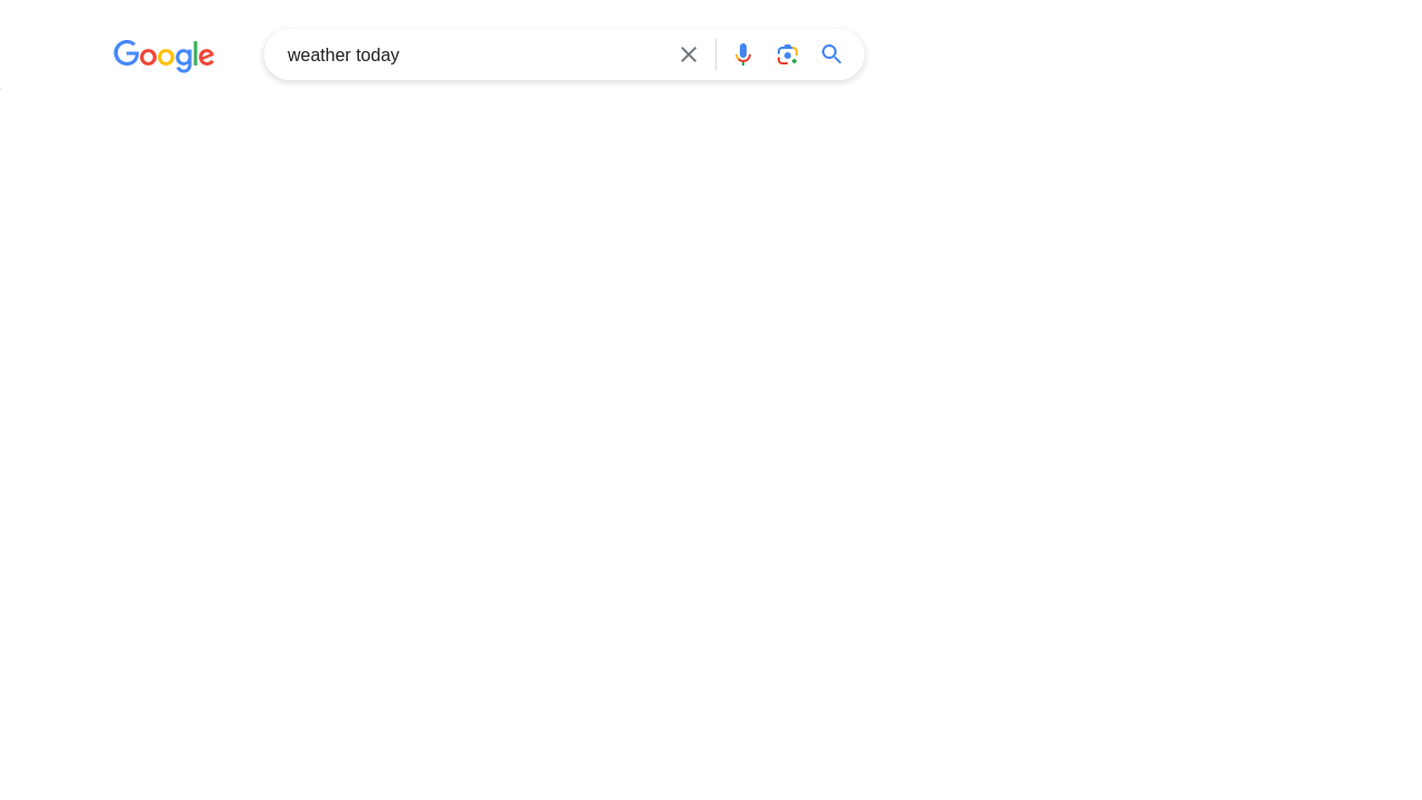

In [14]:
multion.get_screenshot(response, height=800)

`close_session`: Terminate the agent and close the session

In [15]:
multion.close_session(session_id)

ERROR: 'data'
